In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://DrugResponsivenessGuideline_log//Dataset//EDC_EYDC_MDC_regen"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario6_MDC-9K_minmax

dataset = np.load(workdir + "//MDC9K_dataset.npz") # input file
ss0 = np.load(workdir + '//MDC9K_dataset_r0_9_1.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 1


In [6]:
x.shape

(8727, 23538)

In [7]:
training_image_array.shape

(7855, 23538)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 23538) (7855,) (872, 23538) (872,)


In [11]:
inds = np.where(np.isnan(test_X))

In [12]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 23538)
7855 train samples
872 test samples


In [14]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


In [15]:
import matplotlib
from matplotlib import pyplot as plt

In [16]:
y_lin

array([ 1.6937998 ,  1.97992882,  1.85230389,  1.69418582,  1.6542399 ,
        1.97669099,  1.65044484,  1.66933984,  1.98362849,  1.97660337,
        1.91914043,  2.01822825,  1.97756206,  1.98074401,  1.96939452,
        0.3839994 ,  1.96674306,  0.54355626,  1.69544593,  1.94315849,
        1.955493  ,  1.97204751,  1.92194457,  1.98909642,  0.55082274,
        1.64722447,  1.98000979,  0.38252923,  1.96241233,  0.38658543,
        1.9519841 ,  0.99858921,  1.97996377,  1.98018549,  1.69788746,
        0.58912101,  2.0122148 ,  2.00273981,  1.8262833 ,  1.69153896,
        1.97013632,  1.98113885,  1.96927575,  1.69645025,  1.97791678,
        1.97710664,  1.95937813,  1.69353273,  1.99304882,  1.97928898,
       -0.17270276,  1.97582188,  1.98329561,  0.16416145,  1.97589592,
        1.67851563,  0.17561208,  2.01454366,  1.98576229,  1.91779524,
        1.9805505 ,  1.94251635,  1.82383754,  0.36414622,  1.89513933,
        1.97609907,  1.64210145,  1.98243067,  1.97105504,  1.65

In [17]:
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//EDC_EYDC_MDC_regen//MDC9K//SVR"
joblib.dump(svr_lin, workdir + '//MDC9K_SVR_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Result//EDC_EYDC_MDC_regen//MDC9K//SVR//MDC9K_SVR_model.pkl']

In [18]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
c.to_csv(workdir + '//MDC9K_SVR_pred_obs_table.csv')

In [24]:
c

,Predicted,Test
0,1.693800,0.577696
1,1.979929,2.079442
2,1.852304,0.483850
3,1.694186,2.079442
4,1.654240,-0.941620
...,...,...
867,1.657642,1.328457
868,1.928640,1.700243
869,1.928862,1.767344
870,0.402374,-2.164246


In [25]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.22547482802149404, intercept=1.419048342690322, rvalue=0.7676913025144448, pvalue=2.551508125961156e-170, stderr=0.006380985608766056)

In [26]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.2539089636501244


In [27]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.6462646317876317


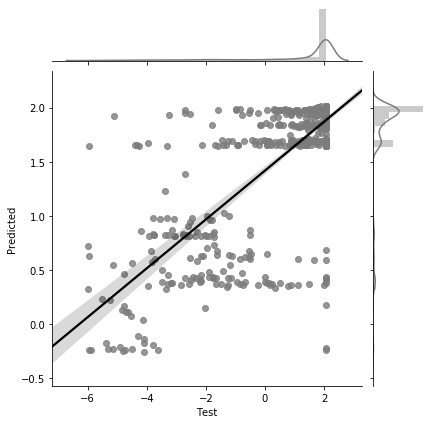

In [28]:
workdir = "D://DrugResponsivenessGuideline_log//Figures//Backbone//EDC_EYDC_MDC_regen//MDC-9K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//MDC9K_SVR.png', dpi=300)